In [1]:
#CLEAN
import nilearn
from nilearn import plotting
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import json

In [2]:
#needed if in /home/dclb to change current work directory to scratch
%cd "../../om2/scratch/Sat/dclb/code/jupyterlab/"

/rdma/vast-rdma/scratch/Sat/dclb/code/jupyterlab


In [3]:
nback_mriqc_paths = glob.glob("../../derivatives/mriqc/sub-*/ses-*/func/sub-*_ses-*_task-nback_rec-moco_run-01_bold.json")

MM_baseline_dict={}
MM_1year_dict={}
HC_baseline_dict={}

for path in nback_mriqc_paths:
    sub = path.split("/")[4].split('-')[1]
    ses = path.split("/")[5].split('-')[1]
    f = open(path)
    data = json.load(f)
    fd_perc = data['fd_perc']
    if 'baseline' in ses:
        if 'MM' in sub:
            MM_baseline_dict[sub]=fd_perc
        else:
            HC_baseline_dict[sub]=fd_perc
    else:
        MM_1year_dict[sub]=fd_perc
        
MM_baseline_df = pd.DataFrame(list(MM_baseline_dict.items()), columns=['Subject', 'fd_perc'])
MM_1year_df = pd.DataFrame(list(MM_1year_dict.items()), columns=['Subject', 'fd_perc'])
HC_baseline_df = pd.DataFrame(list(HC_baseline_dict.items()), columns=['Subject', 'fd_perc'])

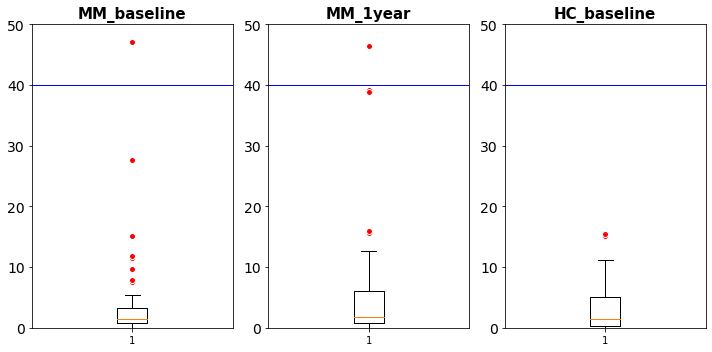

In [4]:
#CLEAN

df_list = [MM_baseline_df,MM_1year_df,HC_baseline_df]
df_names_list = ["MM_baseline","MM_1year","HC_baseline"]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(axs.flat):
    df = df_list[i]
    ax.boxplot(df["fd_perc"],flierprops=red_circle)
    ax.set_title(df_names_list[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylim(0, 50)
    ax.axhline(y=40, c="blue",linewidth=1,zorder=0)

plt.tight_layout()

In [5]:
#CLEAN

MM_baseline_sub_df = MM_baseline_df.loc[MM_baseline_df['fd_perc'] >40].sort_values('fd_perc',ascending=False)
MM_1year_sub_df = MM_1year_df.loc[MM_1year_df['fd_perc'] >40].sort_values('fd_perc',ascending=False)
HC_baseline_sub_df = HC_baseline_df.loc[HC_baseline_df['fd_perc'] >40].sort_values('fd_perc',ascending=False)

sub_df_list=[MM_baseline_sub_df,MM_1year_sub_df,HC_baseline_sub_df]

display(MM_baseline_sub_df)
display(MM_1year_sub_df)
display(HC_baseline_sub_df)

,Subject,fd_perc
3,MM131,47.122302


,Subject,fd_perc
0,MM014,46.402878


,Subject,fd_perc


In [6]:
#CLEAN

new_df_names_list=df_names_list.copy()
new_df_names_list.append('Total')

exclude_df = pd.DataFrame(index=range(0,2),columns=new_df_names_list)

total_sub_count=0
total_count=0

for i in range(0,3):
    exclude_df.iloc[0,i]=int(len(sub_df_list[i]))
    exclude_df.iloc[1,i]=len(sub_df_list[i])/len(df_list[i])
    total_sub_count+=int(len(sub_df_list[i]))
    total_count+=len(df_list[i])

exclude_df.iloc[0,3] = total_sub_count
exclude_df.iloc[1,3] = total_sub_count/total_count

display(exclude_df)

,MM_baseline,MM_1year,HC_baseline,Total
0,1,1,0,2
1,0.016949,0.017241,0.0,0.013423
